In [1]:
# ====================================================================
# ====================================================================
# === C O N V O L U T I O N A L   N E U R O N A L    N E T W O R K ===
# ====================================================================
# ====================================================================

# La CONVOLUCIÓN es realizado al multiplicar un filtro de pixeles con
# una porción de una imgen y sumar los resultado. La salida es más
# positiva cuando la imagen cuadra mejor con el filtro y más negativo
# cuando la porción de la imagen es inversa al filtro.

# Una capa de convolución es cimplemente una colección de filtros, donde
# los valores guardados son los pesos que son aprendidos por la red a través
# del entrenamiento.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,optimizers,utils,datasets
import numpy as np

NUM_CLASSES = 10

# Preparar los datos
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

train_images = train_images.astype('float32')/255.0
train_labels = utils.to_categorical(train_labels,NUM_CLASSES)

test_images = test_images.astype('float32')/255.0
test_labels = utils.to_categorical(test_labels,NUM_CLASSES)

170498071/170498071 [==============================] - 13s 0us/step


In [2]:
# ==================================================
# === D E F  I N I C I Ó N   D E L   M O D E L O ===
# ==================================================

input_layer = layers.Input(shape=(32,32,3))
conv_layer_1=layers.Conv2D(
    filters = 10,         # 10 filtros
    kernel_size = (4,4),  # Ventana de 4x4
    strides = 2,          # Paso de 2 pixeles
    padding = 'same'      # Se asegura tener una imagen a la mitad de la anterior
)(input_layer)
conv_layer_2 = layers.Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10,activation='softmax')(flatten_layer)
model = models.Model(input_layer,output_layer)

model.summary()

# Otra forma de hacerlo
model = models.Sequential()
model.add(layers.Conv2D(filters=10,
                 kernel_size=(4,4),strides=2,padding='same',
                 input_shape=(32,32,3)))
model.add(layers.Conv2D(filters=20,
                        kernel_size=(3,3),strides=2,padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))
model.summary()

# Padding='same' es una buena forma de asegurar que será fácil dar
# seguimiento al tamaño del tensor tras pasar por varias capas convolutivas.

# Aparece el valor None que indica que podemos pasar cualquier
# número de imágenes a través de la red simultáneamente
# Dado que el stride=2, la imagen minimiza su tamaño a la mitad
# Shape de la primera capa convolucional es 4x4x3
# (4x4x3+1)x10 = 490
# Shape de la 2da capa=3x3x10
# (3x3x10+1)(20) = 1820
# La capa Flatten aplana la capa anterior, resulta en 8x8x20=1280

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential"
_____

In [3]:
# =============================================
# === B A T C H   N O R M A L I Z A T I O N ===
# =============================================

# Exploding gradient problem - Cuando los pesos de la red comienzan
#                              a volverse muy grandes. El cálculo del
#                              gradiente puede volverse exponencialemnte
#                              grande, causando fluctuaciones agresivas
#                              en los valores de los pesos.

# Covariate Shift  -  Al escalarse los valores de entrada, se espera que
#                     las activaciones de todas las capas siguientes sean
#                     también escaladas, pero al cambiar los pesos, esta
#                     asunción se puede comenzar a romper. A este fenómeno
#                     se le connoce com ocovariate shift.

# Batch Normalization - Técnica que reduce drásticamente el problema de
#                       de covariate shift. Normaliza los datos antes de
#                       que pasen por la función de activación de cada capa.
# Se implemente de esta manera:
from tensorflow.keras import layers
layers.BatchNormalization(momentum=0.9)
# Momentum -  Técnica que ayuda a superar los mínimos locales para encontrar
#             el mínimo general.


# Overfitting - Si un algoritmo tiene un buen renidmiento en la entrenando
#               con el dataset, pero no en la prueba con el dataset, se dice
#               que está sufriendo un sobreentrenamiento.

# Dropout - Cada capa de Dropout elige al azar un set de unidades de la capa
#           anterior, y establece su salida a 0.
#           Mejora exponencialmente el sobreentrenamiento.
from tensorflow.keras import layers
layers.Dropout(rate=0.25)

In [11]:
# =======================================
# === B U I L D I N G   T H E   C N N ===
# =======================================

from tensorflow.keras import layers, models

input_layer = layers.Input((32,32,3))

x = layers.Conv2D(filters=32,kernel_size=3,
                  strides=1,padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32,kernel_size=3,
                  strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64,kernel_size=3,
                  strides=1,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64,kernel_size=3,strides=2,
                  padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10,activation='softmax')(x)
model = models.Model(input_layer,output_layer)

model.summary()
# Se tiene 4 capas apiladas de Conv2D con BatchNormalization y LeakyReLU.
# Luego se aplanan(Flatten) y se pasan por una capa densa de 128 neuronas
# seguida de una capa BatchNormalization y LeakyReLU.
# Se aplica una capa de regularización Dropout (evitar el sobrentrenamiento)
# Concluyendo con una capa densa de 10 neuronas.

# NOTA ---> El orden para usar BatchNormaliation y las capas de activación
# es cuestión de preferencia. Pero se puede ocupar el acrónimo BAD (BatchNorm, Activation, Dropout)

# Conv1 = (3x3x3+1)x32=896, con forma(32,32,32)
# Conv2 = (3x3x32+1)x32=9248, con forma(16,16,32)
# Conv3 = (3x3x32+1)x64=18496, con forma(16,16,64)
# Conv4 = (3x3x64+1)x64=36928, con forma(8,8,64)
# Flatten = (8x8x64)=4096


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_13 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_14 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                         

In [17]:
# Otro método para hacerlo
from tensorflow.keras.layers import Dense, Conv2D,Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,kernel_size=3,
                 strides=1,padding='same',
                 input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv2D(32,kernel_size=3,
                 strides=2,padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv2D(64,kernel_size=3,
                 strides=1,padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv2D(64, kernel_size=3,
                 strides=2,padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(rate=0.5))

model.add(Dense(10,activation='softmax'))

model.summary()

# La capa BatchNormalization normaliza las entradas de la capa de tal manera
# que tengan una activación de salida media de cero y una desviación estándar de uno.
# Esto es un análogo a cómo se estandarizan las entradas a las redes

# La capa Dropout, aplica una de las técnicas más usadas apra ayudar a mitigar el sobreajuste de modelos i
# Se basa en ignorar ciertos conjuntos de neuronas de la red durante la fase de entrenamiento
# de manera aleatoria. Por "ignorar", nos referimos a que estas neuronas no se
# consideran durante una iteración conreta del proceso de aprendizaje


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_19 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 16, 16, 32)      

In [19]:
# ===========================================
# === T R A I N I N G   T H E   M O D E L ===
# ===========================================

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=32,
          epochs=10,
          shuffle=True,
          validation_data=(test_images,test_labels)
          )

Epoch 1/10
1563/1563 [==============================] - 28s 10ms/step - loss: 1.5674 - accuracy: 0.4541 - val_loss: 2.0080 - val_accuracy: 0.3826
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1559 - accuracy: 0.5915 - val_loss: 1.2816 - val_accuracy: 0.5622
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0136 - accuracy: 0.6452 - val_loss: 0.9829 - val_accuracy: 0.6571
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9211 - accuracy: 0.6773 - val_loss: 1.0081 - val_accuracy: 0.6523
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8591 - accuracy: 0.7016 - val_loss: 0.9663 - val_accuracy: 0.6622
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8127 - accuracy: 0.7190 - val_loss: 0.8184 - val_accuracy: 0.7154
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7694 - accuracy: 0.7327 - val_loss: 0.8558 - val_a

In [20]:
# ===========================
# === E V A L U A T I O N ===
# ===========================
test_loss,test_acc = model.evaluate(test_images,test_labels,batch_size=1000)
print("Test_accuracy: ",test_acc)

10/10 [==============================] - 1s 24ms/step - loss: 0.9743 - accuracy: 0.6704
Test_accuracy:  0.6704000234603882


In [34]:
# =============================
# === P R E D I C T I O N S ===
# =============================
CLASSES = np.array(['Airplane','Automobile','Bird','Cat','Deer',
                    'Dog','Frog','Horse','Ship','Truck'])
preds = model.predict(test_images)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(test_labels,axis=-1)]
print(preds_single, actual_single)

313/313 [==============================] - 1s 2ms/step
['Cat' 'Ship' 'Airplane' ... 'Dog' 'Automobile' 'Horse'] ['Cat' 'Ship' 'Ship' ... 'Dog' 'Automobile' 'Horse']


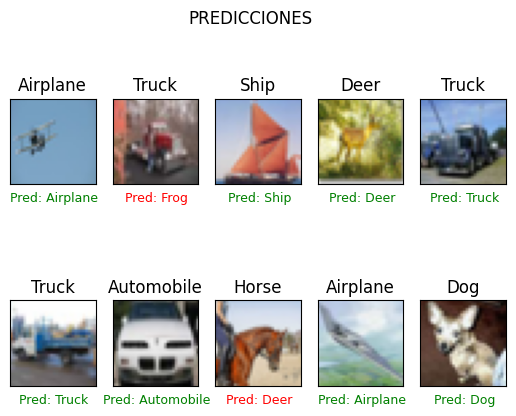

In [53]:
# =========================================
# === O B S E R V A R   I M Á G E N E S ===
# =========================================
import matplotlib.pyplot as plt

num = 10
# Serán seleccionados 10 índices de manera aleatoria de entre 10,000
indices = np.random.choice(range(len(test_images)),num)
fig,ax = plt.subplots(2,5)
fig.suptitle("PREDICCIONES")
# Enumerate da la clave para cada valor de indices

for row in range(2):
  for column in range(5):
    # Obtenemos índices dle 1 al 10
    idx = column+1+(row*5)
    # Imprimimos del 0 al 9
    img = test_images[indices[idx-1]]
    ax[row,column].imshow(img)
    #Mostramos el título
    ax[row,column].set_title(actual_single[indices[idx-1]])

    # Quitamos los ticks
    ax[row,column].set_xticks([])
    ax[row,column].set_yticks([])

    # Si es correcto, se imprime de color verde,
    # de lo contrario, se imprime de color roo
    if preds_single[indices[idx-1]] == actual_single[indices[idx-1]]:
      color = 'g'
    else:
      color = 'r'

    # x,y,texto,
    ax[row,column].text(16,38,"Pred: "+str(preds_single[indices[idx-1]]),
                        ha='center',fontsize=9,color=color)
plt.show()